# Preprocess

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

### Loading Cifar Dataset

Loaded Cifer Dataset

Sample :


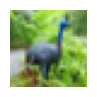


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [26]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Loaded Cifer Dataset")
print("")
print("Sample :")

plt.figure(figsize=(1,1))  # Adjust the size as needed
plt.imshow(x_train[6])
plt.axis('off')  # Remove the axis
plt.show()
print("")
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

In [13]:
x_train_ann = np.reshape(x_train, [-1, 32*32*3])
x_train_ann = x_train_ann.astype('float32') / 255
x_test_ann = np.reshape(x_test, [-1, 32*32*3])
x_test_ann = x_test_ann.astype('float32') / 255

In [14]:
y_train_ann = to_categorical(y_train)
y_test_ann = to_categorical(y_test)

# Skip connection

## Defining skip connection block using add


In [7]:
from keras.models import Sequential, Model
from keras.layers import SeparableConv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Flatten, Dense, add
import tensorflow as tf

In [8]:
def create_block(x, n):
  x1 = Dense(n, activation='relu')(x)

  x2 = Dense(n, activation='relu')(x1)

  x3 = Dense(n, activation='relu')(x2)

  x4 = Dense(n, activation='relu')(x3)

  add1 = add([x4, x1])

  return add1

## Skip connection model 1 (3 blocks)

In [36]:
model1a = Sequential()
input_shape=(32*32*3,1)
img_input = Input(input_shape)

x = Dense(128, activation='relu')(img_input)
b1 = create_block(x, 128)
b2 = create_block(b1, 64)
b3 = create_block(b2, 32)

output= Flatten()(b3)
output = Dense(64, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model1a = Model(img_input, output)
model1a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
b3.shape

TensorShape([None, 3072, 32])

In [8]:
output.shape

TensorShape([None, 10])

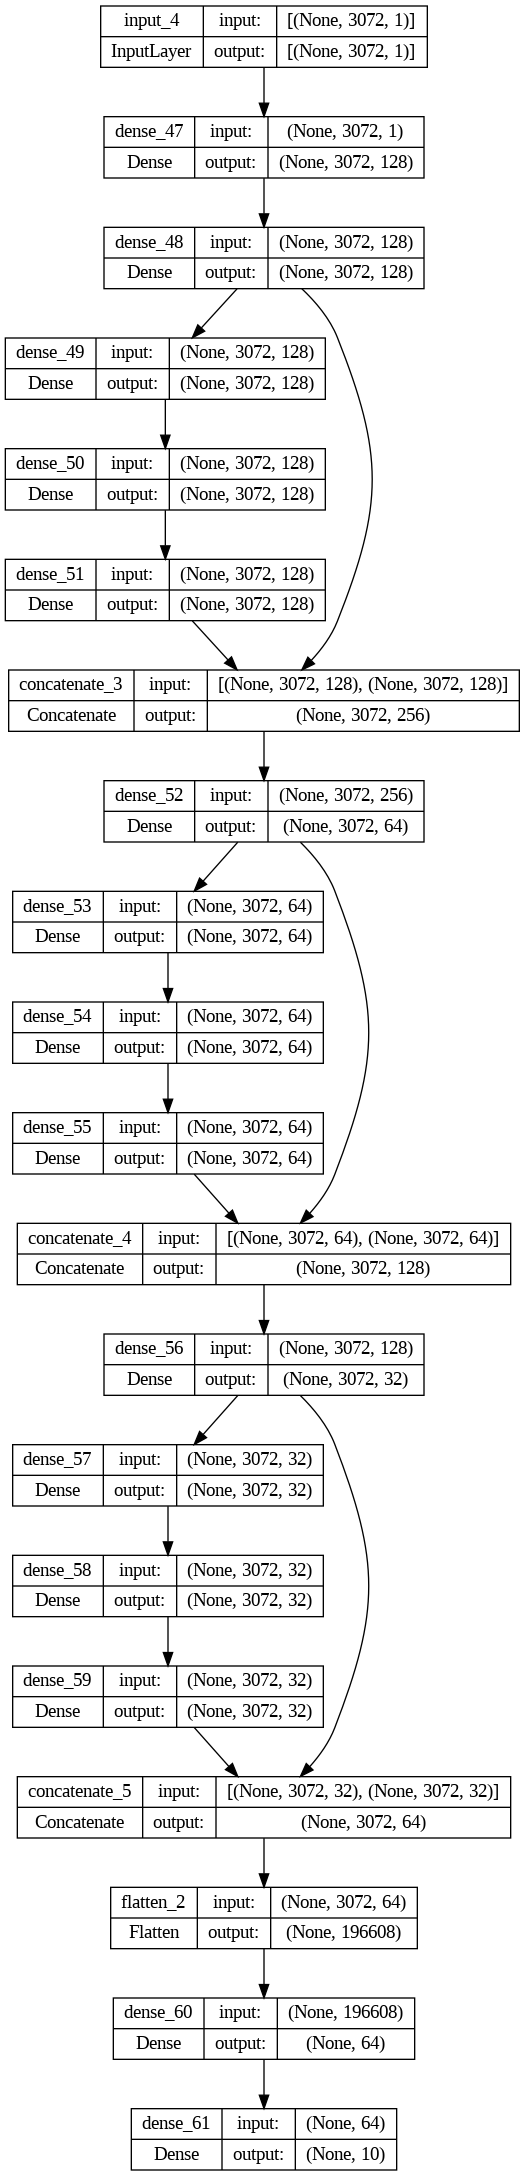

In [37]:
from keras.utils import plot_model
plot_model(model1a, show_shapes=True)

In [38]:
model1a.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3072, 1)]            0         []                            
                                                                                                  
 dense_47 (Dense)            (None, 3072, 128)            256       ['input_4[0][0]']             
                                                                                                  
 dense_48 (Dense)            (None, 3072, 128)            16512     ['dense_47[0][0]']            
                                                                                                  
 dense_49 (Dense)            (None, 3072, 128)            16512     ['dense_48[0][0]']            
                                                                                            

In [15]:
model1a.fit(x_train_ann, y_train_ann, epochs=10, batch_size=32, validation_data=(x_test_ann, y_test_ann))

Epoch 1/10
1563/1563 [==============================] - 92s 51ms/step - loss: 1.7520 - accuracy: 0.3774 - val_loss: 1.6128 - val_accuracy: 0.4285
Epoch 2/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5632 - accuracy: 0.4480 - val_loss: 1.5795 - val_accuracy: 0.4438
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4956 - accuracy: 0.4741 - val_loss: 1.5251 - val_accuracy: 0.4575
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4441 - accuracy: 0.4908 - val_loss: 1.5075 - val_accuracy: 0.4680
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4025 - accuracy: 0.5031 - val_loss: 1.5052 - val_accuracy: 0.4653
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3593 - accuracy: 0.5183 - val_loss: 1.5390 - val_accuracy: 0.4671
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3211 - accuracy: 0.5331 - val_loss: 1.5549 -

In [17]:
test_loss_ann, test_acc_ann = model1a.evaluate(x_test_ann, y_test_ann, verbose=2)

print('\nTest accuracy:', test_acc_ann)

313/313 - 6s - loss: 1.5900 - accuracy: 0.4583 - 6s/epoch - 20ms/step

Test accuracy: 0.45829999446868896


In [18]:
model1a.save('ann_add_3blocks.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Defining skip connection block using concate


In [19]:
from keras.models import Sequential, Model
from keras.layers import SeparableConv2D, MaxPooling2D, BatchNormalization, Dropout, Input, Flatten, Dense, add,concatenate
import tensorflow as tf

In [17]:
def create_block_c(x, n):
  x1 = Dense(n, activation='relu')(x)

  x2 = Dense(n, activation='relu')(x1)

  x3 = Dense(n, activation='relu')(x2)

  x4 = Dense(n, activation='relu')(x3)

  add1 = concatenate([x4, x1])

  return add1

## Skip connection model 1 (3 blocks)

In [20]:
model1 = Sequential()
input_shape=(32*32*3,1)
img_input = Input(input_shape)

x = Dense(128, activation='relu')(img_input)
b1 = create_block_c(x, 128)
b2 = create_block_c(b1, 64)
b3 = create_block_c(b2, 32)

output= Flatten()(b3)
output = Dense(64, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model1 = Model(img_input, output)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
b3.shape

TensorShape([None, 3072, 64])

In [22]:
output.shape

TensorShape([None, 10])

Exception ignored in: <function _xla_gc_callback at 0x79b83bdc8700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


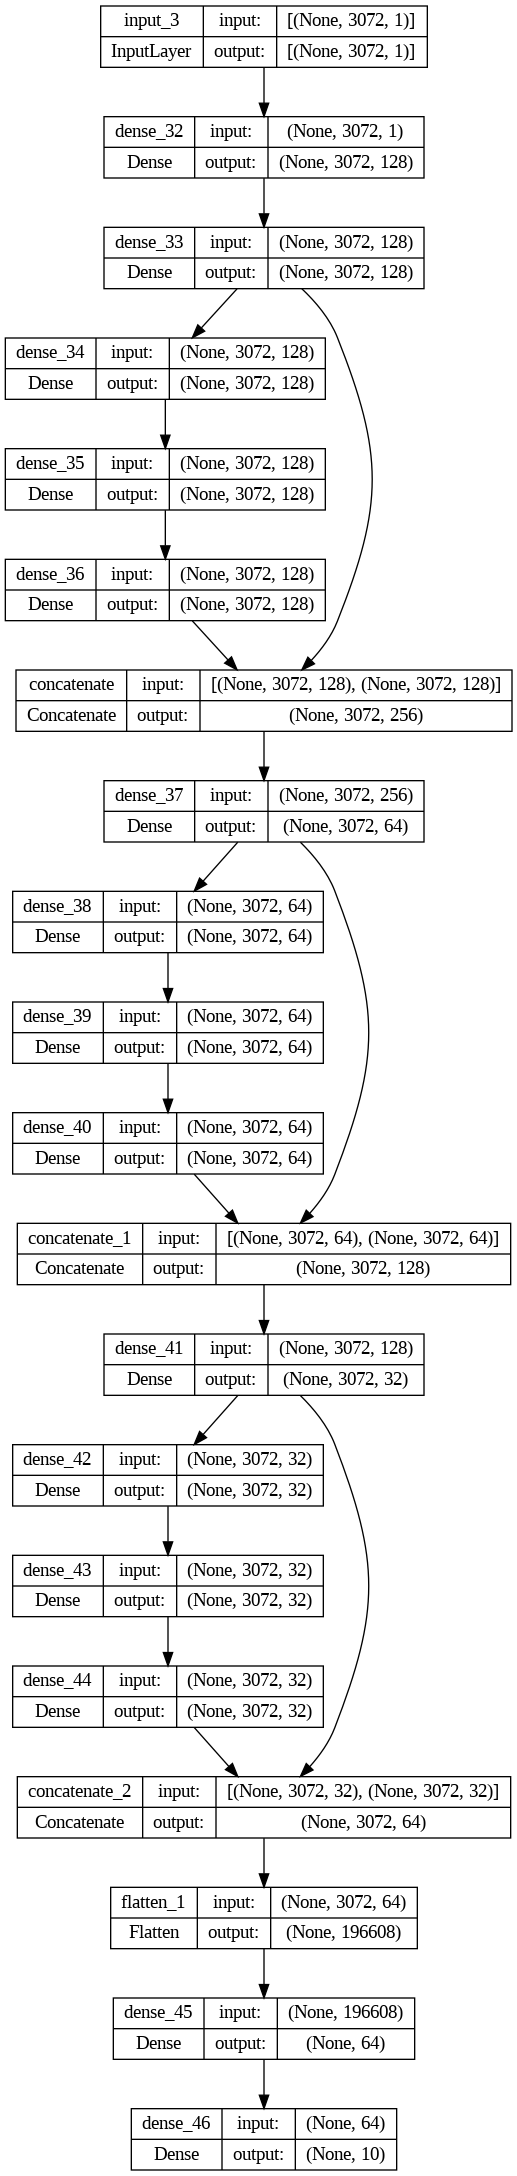

In [23]:
from keras.utils import plot_model
plot_model(model1, show_shapes=True)

In [24]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 3072, 1)]            0         []                            
                                                                                                  
 dense_32 (Dense)            (None, 3072, 128)            256       ['input_3[0][0]']             
                                                                                                  
 dense_33 (Dense)            (None, 3072, 128)            16512     ['dense_32[0][0]']            
                                                                                                  
 dense_34 (Dense)            (None, 3072, 128)            16512     ['dense_33[0][0]']            
                                                                                            

In [27]:
x_train_ann = np.reshape(x_train, [-1, 32*32*3])
x_train_ann = x_train_ann.astype('float32') / 255
x_test_ann = np.reshape(x_test, [-1, 32*32*3])
x_test_ann = x_test_ann.astype('float32') / 255

In [28]:
y_train_ann = to_categorical(y_train)
y_test_ann = to_categorical(y_test)

In [30]:
model1.fit(x_train_ann, y_train_ann, epochs=10, batch_size=32, validation_data=(x_test_ann, y_test_ann))

Epoch 1/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.6466 - accuracy: 0.7737 - val_loss: 2.4155 - val_accuracy: 0.4157
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5603 - accuracy: 0.8024 - val_loss: 2.6849 - val_accuracy: 0.4075
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.4928 - accuracy: 0.8261 - val_loss: 2.9409 - val_accuracy: 0.4003
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.4354 - accuracy: 0.8470 - val_loss: 3.0378 - val_accuracy: 0.4064
Epoch 5/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.3753 - accuracy: 0.8681 - val_loss: 3.4656 - val_accuracy: 0.3958
Epoch 6/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.3444 - accuracy: 0.8795 - val_loss: 3.7500 - val_accuracy: 0.3955
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.3030 - accuracy: 0.8956 - val_loss: 4.1139 -

In [32]:
test_loss_ann, test_acc_ann = model1.evaluate(x_test_ann, y_test_ann, verbose=2)

print('\nTest accuracy:', test_acc_ann)

313/313 - 7s - loss: 4.7095 - accuracy: 0.3930 - 7s/epoch - 24ms/step

Test accuracy: 0.3930000066757202


In [33]:
model1.save('ann_concate_3blocks.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Custom data generator



## Defining custom data generator function in keras

In [34]:
from keras.utils import Sequence
import numpy as np

class CustomDataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]


        return np.array(batch_x), np.array(batch_y)


## Using custom data generator with ann add 3 block model

In [44]:
batch_size = 32

train_generator = CustomDataGenerator(x_train_ann, y_train_ann, batch_size)
model1a.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train_ann)//batch_size)



Epoch 1/10


<ipython-input-44-482432b23843>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1a.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train_ann)//batch_size)


1562/1562 [==============================] - 87s 51ms/step - loss: 1.7402 - accuracy: 0.3840
Epoch 2/10
1562/1562 [==============================] - 76s 49ms/step - loss: 1.5711 - accuracy: 0.4482
Epoch 3/10
1562/1562 [==============================] - 77s 49ms/step - loss: 1.5040 - accuracy: 0.4714
Epoch 4/10
1562/1562 [==============================] - 78s 50ms/step - loss: 1.4497 - accuracy: 0.4907
Epoch 5/10
1562/1562 [==============================] - 76s 49ms/step - loss: 1.3912 - accuracy: 0.5096
Epoch 6/10
1562/1562 [==============================] - 75s 48ms/step - loss: 1.3308 - accuracy: 0.5333
Epoch 7/10
1562/1562 [==============================] - 75s 48ms/step - loss: 1.2581 - accuracy: 0.5575
Epoch 8/10
1562/1562 [==============================] - 76s 49ms/step - loss: 1.1657 - accuracy: 0.5895
Epoch 9/10
1562/1562 [==============================] - 76s 48ms/step - loss: 1.0610 - accuracy: 0.6250
Epoch 10/10
1562/1562 [==============================] - 75s 48ms/step - lo

In [45]:
test_loss, test_acc = model1a.evaluate(x_test_ann, y_test_ann)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 8s 24ms/step - loss: 1.9225 - accuracy: 0.4088
Test Accuracy: 0.40880000591278076


In [46]:
model1a.save('ann_add_3blocks_customgen.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Using custom data generator with ann concate 3 block model

In [35]:
batch_size = 32

train_generator = CustomDataGenerator(x_train_ann, y_train_ann, batch_size)
m=model1.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train_ann)//batch_size)




<ipython-input-35-d9faa300f336>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  m=model1.fit_generator(generator=train_generator, epochs=10, steps_per_epoch=len(x_train_ann)//batch_size)


Epoch 1/10
1562/1562 [==============================] - 83s 52ms/step - loss: 0.2078 - accuracy: 0.9277
Epoch 2/10
1562/1562 [==============================] - 79s 51ms/step - loss: 0.2006 - accuracy: 0.9302
Epoch 3/10
1562/1562 [==============================] - 76s 49ms/step - loss: 0.1829 - accuracy: 0.9369
Epoch 4/10
1562/1562 [==============================] - 81s 52ms/step - loss: 0.1793 - accuracy: 0.9381
Epoch 5/10
1562/1562 [==============================] - 84s 54ms/step - loss: 0.1640 - accuracy: 0.9443
Epoch 6/10
1562/1562 [==============================] - 77s 49ms/step - loss: 0.1571 - accuracy: 0.9464
Epoch 7/10
1562/1562 [==============================] - 78s 50ms/step - loss: 0.1501 - accuracy: 0.9496
Epoch 8/10
1562/1562 [==============================] - 76s 48ms/step - loss: 0.1458 - accuracy: 0.9508
Epoch 9/10
1562/1562 [==============================] - 76s 49ms/step - loss: 0.1414 - accuracy: 0.9518
Epoch 10/10
1562/1562 [==============================] - 77s 50m

In [41]:
test_loss, test_acc = model1.evaluate(x_test_ann, y_test_ann)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 9s 28ms/step - loss: 6.2367 - accuracy: 0.3874
Test Accuracy: 0.3874000012874603


In [43]:
model1.save('ann_concate_3blocks_customgen.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Dummy Skip connection model 2 (6 blocks)


In [9]:
model2 = Sequential()
input_shape=(32*32*3,1)
img_input = Input(input_shape)

x = Dense(128, activation='relu')(img_input)
b1 = create_block(x, 512)
b2 = create_block(b1, 256)
b3 = create_block(b2, 128)
b4 = create_block(b3, 64)
b5 = create_block(b4, 32)
b6 = create_block(b5, 16)

output= Flatten()(b6)
output = Dense(16, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model2 = Model(img_input, output)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

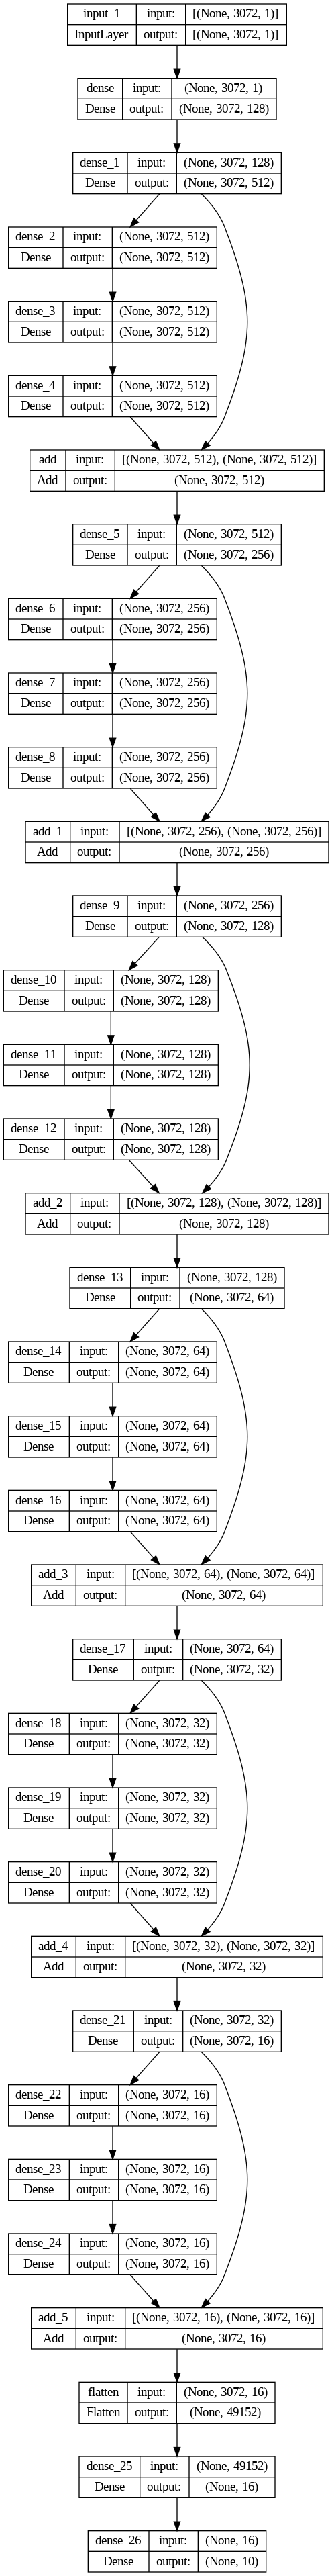

In [10]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True)

In [11]:
model2.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x79b80834ba90>>

In [15]:
model2.fit(x_train_ann, y_train_ann, epochs=10, batch_size=16, validation_data=(x_test_ann, y_test_ann))

Epoch 1/10
3125/3125 [==============================] - 416s 130ms/step - loss: 2.3029 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1004/3125 [========>.....................] - ETA: 4:08 - loss: 2.3029 - accuracy: 0.0995

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model2.evaluate(x_test_ann, y_test_ann, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
model2.save('ann_add_6blocks.h5')

## Skip connection model 2 (6 blocks)


In [ ]:
model2 = Sequential()
input_shape=(32*32*3,1)
img_input = Input(input_shape)

x = Dense(128, activation='relu')(img_input)
b1 = create_block(x, 512)
b2 = create_block(b1, 256)
b3 = create_block(b2, 128)
b4 = create_block(b3, 64)
b5 = create_block(b4, 32)
b6 = create_block(b5, 16)

output= Flatten()(b6)
output = Dense(16, activation='relu')(output)
output = Dense(10, activation='softmax')(output)

model2 = Model(img_input, output)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.utils import plot_model
plot_model(model2, show_shapes=True)

In [ ]:
model2.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7f24ef1c7250>>

In [ ]:
model2.fit(x_train_ann, y_train_ann, epochs=3, batch_size=16, validation_data=(x_test_ann, y_test_ann))

Epoch 1/3
 735/3125 [======>.......................] - ETA: 3:49 - loss: 2.1916 - accuracy: 0.1461

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model2.evaluate(x_test_ann, y_test_ann, verbose=2)

print('\nTest accuracy:', test_acc)